In [519]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [521]:
data = pd.read_csv(r"C:\Users\yengl\Desktop\CodeOp\Group Project\Most Streamed Spotify Songs 2024.csv", encoding = 'unicode_escape')

In [523]:
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


Brief description of the variables in this dataset.

1. **Track**: Name or title of the song.  
2. **Album Name**: Name of the album in which the track is featured.  
3. **Artist**: Name of the performer(s) or band that recorded the track.  
4. **Release Date**: When the track or album was officially released.  
5. **ISRC (International Standard Recording Code)**: A unique identifier for the track, used to track royalties and usage.  
6. **All Time Rank**: The ranking of the track based on cumulative performance metrics in Spotify.  
7. **Track Score**: An aggregate score that represents the overall performance or popularity of the track.  
8. **Spotify Streams**: Total number of times the track has been streamed on Spotify.  
9. **Spotify Playlist Count**: The number of Spotify playlists that include this track.  
10. **Spotify Playlist Reach**: The estimated total audience or potential listeners of the playlists where the track is featured.  
11. **Spotify Popularity**: A metric provided by Spotify, ranging from 0 to 100, reflecting the current popularity of the track.  
12. **YouTube Views**: Total number of views the track’s associated video has received on YouTube.  
13. **YouTube Likes**: Number of likes the track’s video has received on YouTube.  
14. **TikTok Posts**: Number of TikTok videos that use the track as background music.  
15. **TikTok Likes**: Total likes received by all TikTok posts featuring the track.  
16. **TikTok Views**: Total views of TikTok posts featuring the track.  
17. **YouTube Playlist Reach**: The total potential audience of YouTube playlists that include the track.  
18. **Apple Music Playlist Count**: The number of Apple Music playlists that feature the track.  
19. **AirPlay Spins**: Number of times the track was played via AirPlay (radio airplay or streaming service broadcasts).  
20. **SiriusXM Spins**: Number of times the track has been played on SiriusXM satellite radio.  
21. **Deezer Playlist Count**: The number of playlists on Deezer that include the track.  
22. **Deezer Playlist Reach**: Estimated total audience or reach of the playlists on Deezer that feature the track.  
23. **Amazon Playlist Count**: Number of playlists on Amazon Music that include the track.  
24. **Pandora Streams**: Total streams of the track on Pandora.  
25. **Pandora Track Stations**: The number of Pandora stations (custom or curated) that include the track.  
26. **Soundcloud Streams**: Total number of streams the track has received on SoundCloud.  
27. **Shazam Counts**: Number of times the track has been identified using Shazam.  
28. **TIDAL Popularity**: A measure of the track's popularity on TIDAL, usually reflecting plays, likes, and shares.  
29. **Explicit Track**: A boolean value indicating whether the track contains explicit content (e.g., profanity or adult themes).  

In [365]:
n_rows , n_cols = data.shape
print(f'There are {n_rows} rows and {n_cols} columns in the dataset')

There are 4600 rows and 29 columns in the dataset


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [369]:
data.duplicated().sum()

2

There are 2 rows that have duplicated data. In order to keep the integrity of our dataset, this rows are going to be deleted

In [525]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(4598, 29)

Once we've deleted the duplicated values, we proceed to check for NaN values

In [373]:
nan_count_per_column = data.isna().sum()
print(nan_count_per_column)

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popularity              4598
Explicit Track      

with this code, we can see which columns have NaN values. It is important to point out that the columns that have more NaN values (from youtube playlist Reach until Explicit Track) are not going to be used for this EDA, deleting them will impact our study so we decide to keep them.

However, having artists with empty values may distort the analysis. We delete them as they represent a small percentage of out dataset.

In [375]:
data[data['Artist'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
311,Cool,JnD Mix,NaN,5/25/2024,QZNWQ2410638,311,86.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,624,577",NaN,0
480,I Wanna Party,I Wanna Party - Single,NaN,5/31/2024,QZYFZ2445017,482,70.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1345,Marlboro Remix,Marlboro Remix - Single,NaN,6/7/2024,QZNWT2471497,"1,343",40.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"504,979",NaN,0
1561,Melting,Melting - Single,NaN,6/10/2024,QZNWU2402635,"1,553",37.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"289,134",NaN,0
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),NaN,5/2/2024,MX2832415361,"3,381",23.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,606,561",NaN,0


Even though there are only 5 rows without Artist, making a replacement manually will take some time and it is just better to delete them

In [527]:
for column in data.columns:
    print(column, data[column].isnull().sum())

Track 0
Album Name 0
Artist 5
Release Date 0
ISRC 0
All Time Rank 0
Track Score 0
Spotify Streams 113
Spotify Playlist Count 70
Spotify Playlist Reach 72
Spotify Popularity 804
YouTube Views 308
YouTube Likes 315
TikTok Posts 1173
TikTok Likes 980
TikTok Views 981
YouTube Playlist Reach 1009
Apple Music Playlist Count 561
AirPlay Spins 498
SiriusXM Spins 2123
Deezer Playlist Count 921
Deezer Playlist Reach 928
Amazon Playlist Count 1055
Pandora Streams 1106
Pandora Track Stations 1268
Soundcloud Streams 3332
Shazam Counts 577
TIDAL Popularity 4598
Explicit Track 0


In [381]:
data_cleaned = data.dropna(subset=['Artist'])

In [385]:
data_cleaned = data_cleaned.dropna(subset=['Spotify Streams'])

In [387]:
data_cleaned = data_cleaned.dropna(subset=['YouTube Likes'])

In [389]:
data_cleaned = data_cleaned.dropna(subset=['TikTok Likes'])

Now we are going to change some data types, in order to be able to use them for some calculations:
- Release Date is an object and we need it to be a datestamp
- Spotify streams is an object and it should be a number (float)
- Youtube Likes should be a number (float)
- TikTok likes should be a number (float)

This dataset offer different platforms to make comparations with, but in order to keep it focused, we decided to select the performance on this specific platforms (Youtube and Tiktok) that are widely used compared to other platforms (like Pandora, Amazon, Shazam, Deezer)

In [391]:
data_cleaned['Release Date'] = pd.to_datetime(data_cleaned['Release Date'], errors = 'coerce')

In [393]:
data_cleaned.reset_index(drop=True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       3514 non-null   object        
 1   Album Name                  3514 non-null   object        
 2   Artist                      3514 non-null   object        
 3   Release Date                3514 non-null   datetime64[ns]
 4   ISRC                        3514 non-null   object        
 5   All Time Rank               3514 non-null   object        
 6   Track Score                 3514 non-null   float64       
 7   Spotify Streams             3514 non-null   object        
 8   Spotify Playlist Count      3514 non-null   object        
 9   Spotify Playlist Reach      3514 non-null   object        
 10  Spotify Popularity          3245 non-null   float64       
 11  YouTube Views               3514 non-null   object      

In [395]:
data_cleaned['Spotify Streams'] = data_cleaned['Spotify Streams'].str.replace(',','').astype(float)

In [397]:
data_cleaned['All Time Rank'] = data_cleaned['All Time Rank'].str.replace(',','').astype(float)

In [399]:
data_cleaned['YouTube Likes'] = data_cleaned['YouTube Likes'].str.replace(',','').astype(float)

In [401]:
data_cleaned['TikTok Likes'] = data_cleaned['TikTok Likes'].str.replace(',','').astype(float)

In [405]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       3514 non-null   object        
 1   Album Name                  3514 non-null   object        
 2   Artist                      3514 non-null   object        
 3   Release Date                3514 non-null   datetime64[ns]
 4   ISRC                        3514 non-null   object        
 5   All Time Rank               3514 non-null   float64       
 6   Track Score                 3514 non-null   float64       
 7   Spotify Streams             3514 non-null   float64       
 8   Spotify Playlist Count      3514 non-null   object        
 9   Spotify Playlist Reach      3514 non-null   object        
 10  Spotify Popularity          3245 non-null   float64       
 11  YouTube Views               3514 non-null   object      

In [409]:
data_cleaned.sample(n=10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
475,On My Mama,On My Mama,Victoria Monï¿½,2023-06-16,USRC12204025,582.0,63.1,119798692.0,"16,874","43,909,927",...,382,39.0,"8,198,464",78.0,"17,556,177","11,350","2,797,592","1,507,722",NaN,1
3429,You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve,Fearless (Taylor's Version),Taylor Swift,2021-04-09,USUG12100622,4458.0,19.7,662057533.0,"59,739","35,937,845",...,NaN,8.0,"149,944",46.0,"10,543,057","23,062",NaN,"659,091",NaN,0
48,What Was I Made For? [From The Motion Picture ...,What Was I Made For? (From The Motion Picture ...,Billie Eilish,2023-07-13,USUM72307484,69.0,177.6,891720245.0,"114,560","97,542,546",...,68,108.0,"10,920,686",111.0,"39,374,594","19,921","5,418,596","4,476,509",NaN,0
2679,Yebbaï¿½ï¿½ï¿½s Hear,Certified Lover Boy,Drake,2021-09-03,USUG12104407,3448.0,23.3,349849639.0,"81,889","12,970,647",...,8,6.0,"175,258",3.0,"6,377,789","7,857",NaN,"1,419,180",NaN,1
824,bad idea right?,bad idea right?,Olivia Rodrigo,2023-08-11,USUG12304094,1012.0,47.7,433515672.0,"37,313","23,894,665",...,495,38.0,"8,664,321",37.0,"10,949,173","15,146",NaN,"706,445",NaN,1
1574,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Hana Cï¿½ï¿½ï¿½m,2023-01-03,DGA092216622,1994.0,32.3,558538.0,63,"2,483",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1769,Malas Decisiones,K23,Kenia OS,2022-10-27,MXF012200331,2246.0,30.2,249199925.0,"15,573","11,736,236",...,479,15.0,"100,850",4.0,"167,084",654,NaN,"576,456",NaN,0
442,Murder In My Mind,Murder In My Mind,Kordhell,2022-01-21,QM4TW2218315,547.0,65.6,668285368.0,"120,095","62,454,609",...,338,7.0,"127,461",10.0,"5,328,696","7,896","38,200,577","2,597,736",NaN,1
470,Cheques,Still Rollin,Shubh,2023-05-19,QM6P42332212,576.0,63.4,276505971.0,"18,698","9,458,603",...,NaN,NaN,NaN,22.0,"54,106",66,"2,225,764","509,690",NaN,0
497,ýýchame La Culpa,ýýchame La Culpa,Luis Fonsi,2017-11-17,USUM71712163,607.0,61.4,935042457.0,"92,728","21,057,073",...,NaN,76.0,"175,283",36.0,"113,179,212","41,836",NaN,"8,719,140",NaN,0


when making a random sampling to check if the data was properly cleaned, we figure that there were some artists that had special characters that weren't easily replaceable.

In [195]:
filtered_rows = data_cleaned[data_cleaned['Artist'].str.contains('½', na=False)]
print(filtered_rows)

                                   Track                          Album Name  \
86                                 Hands                               Hands   
102                        Casca de Bala           A Cara das Vaquejadas 3.0   
124                            DESPECHï¿                           DESPECHï¿   
190                         Si No Estï¿½               Si No Estï¿½ï¿½s - Si   
206              girls like me don't cry             Girls Like Me Don't Cry   
...                                  ...                                 ...   
3355                   Coraï¿½ï¿½ï¿½ï¿½o                        Patroas, EP1   
3413  Nobody Like U - From "Turning Red"  Nobody Like U (From "Turning Red")   
3414                          Hep Mi Ben                          Hep Mi Ben   
3486                 B.S. (feat. H.E.R.)                            Chilombo   
3513     Me Acostumbre (feat. Bad Bunny)     Me Acostumbre (feat. Bad Bunny)   

                                       

as there were few columns we decided to drop them in order to guarantee uniformity in the dataset

In [411]:
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('½', na = False)]
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('ý', na = False)]
print(data_cleaned)

                                                  Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                           Lovin On Me   
...                                                 ...   
3508  ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...   
3509                                  For the Last Time   
3510                                   Dil Meri Na Sune   
3511                              Grace (feat. 42 Dugg)   
3512                                Nashe Si Chadh Gayi   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Ar

In [413]:
data_cleaned.reset_index(drop=True, inplace = True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       3414 non-null   object        
 1   Album Name                  3414 non-null   object        
 2   Artist                      3414 non-null   object        
 3   Release Date                3414 non-null   datetime64[ns]
 4   ISRC                        3414 non-null   object        
 5   All Time Rank               3414 non-null   float64       
 6   Track Score                 3414 non-null   float64       
 7   Spotify Streams             3414 non-null   float64       
 8   Spotify Playlist Count      3414 non-null   object        
 9   Spotify Playlist Reach      3414 non-null   object        
 10  Spotify Popularity          3155 non-null   float64       
 11  YouTube Views               3414 non-null   object      

In [249]:
filtered_rows_2 = data_cleaned[data_cleaned['Track'].str.contains('½', na=False)]
print(filtered_rows_2)

                                                  Track  \
30    Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   
62                                   Titï¿½ï¿½ Me Pregu   
93                                  MI EX TENï¿½ï¿½A RA   
97                                           Acrï¿½ï¿½s   
120                                           Seï¿½ï¿½o   
...                                                 ...   
3326                        Cena Engraï¿½ï¿½ada e Inusi   
3331            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   
3344                                         DANï¿½ï¿½A   
3405                                     Dayanamï¿½ï¿½y   
3408                                      3 Haselnï¿½ï¿   

                                             Album Name         Artist  \
30    Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   sped up 8282   
62                                     Un Verano Sin Ti      Bad Bunny   
93                MAï¿½ï¿½ANA SERï¿½ï¿½ BONITO (BICHOTA        KAROL 

In [415]:
data_cleaned.sample(n=10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
1236,Thunder,Thunder,Gabry Ponte,2021-05-07,ITV952100014,1582.0,36.8,551090518.0,"146,088","68,848,253",...,NaN,37.0,"851,965",25.0,"8,469,326","3,654",NaN,"3,084,343",NaN,0
844,DILUVIO,PLAYA SATURNO,Rauw Alejandro,2023-07-07,USSD12300302,1078.0,46.0,310562790.0,"33,458","54,918,981",...,50,42.0,"3,054,645",43.0,"9,966,566","2,768","169,769","841,414",NaN,1
1210,Despeinada,Despeinada,Ozuna,2020-09-03,USXDR2000590,1555.0,37.2,420652971.0,"51,117","16,617,076",...,8,18.0,"213,074",30.0,"19,699,364","4,392",NaN,"1,165,902",NaN,0
428,BREAK MY SOUL,BREAK MY SOUL,Beyoncï¿,2022-06-21,USSM12206234,544.0,65.7,443564590.0,"80,121","43,604,917",...,"1,089",73.0,"1,986,611",115.0,"24,808,925","23,163","4,766,826","2,682,867",NaN,0
1080,Komang,Komang,Raim Laode,2022-08-17,SGB502228663,1378.0,39.8,329763216.0,"16,110","3,893,973",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"108,281",NaN,0
2056,Like What (Freestyle),Like What (Freestyle),Cardi B,2024-03-01,USAT22401675,2696.0,27.1,23475715.0,"2,809","14,222,754",...,120,14.0,"176,615",31.0,"9,313,905","2,075","1,046,901","164,762",NaN,1
824,NIGHT DANCER,NIGHT DANCER - Single,imase,2022-08-19,JPPO02202918,1045.0,46.9,239149370.0,"46,984","6,134,615",...,NaN,3.0,"10,100",2.0,"304,322",906,NaN,"1,864,998",NaN,0
2192,Car's Outside,YOU,James Arthur,2019-10-18,DEE861903416,2876.0,26.0,578464780.0,"64,098","29,245,701",...,NaN,34.0,"211,486",1.0,"1,516,875","2,721",NaN,"2,697,578",NaN,0
3380,Minefields,Minefields,Faouzia,2020-11-05,USAT22006815,4513.0,19.6,160979905.0,"23,825","5,329,581",...,NaN,14.0,"143,722",23.0,"4,744,421","2,727",NaN,"2,000,620",NaN,0
3020,Wrong,Wrong,Luh Kel,2019-04-05,QMKSC1900177,4052.0,21.2,279660513.0,"39,887","4,756,079",...,NaN,NaN,NaN,NaN,"24,537,425","84,838",NaN,"759,049",NaN,0


we run this code 5-10 times just to make a random check of the whole dataset, as we can't do it manually

In [529]:
data_cleaned[data_cleaned['Spotify Popularity'] == 0]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Year,Month,Season


# Analysis

## What is the overall distribution of ratings across different songs?

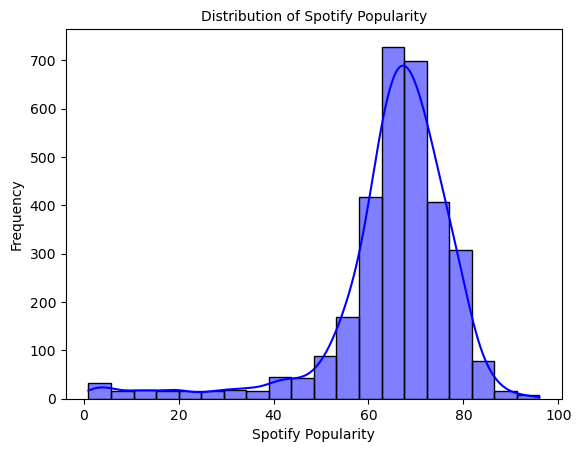

In [429]:
sns.histplot(data = data_cleaned, x='Spotify Popularity', kde=True, bins=20, color='blue')
plt.title("Distribution of Spotify Popularity", fontsize=10)
plt.xlabel('Spotify Popularity')
plt.ylabel('Frequency')
plt.show()

The histogram of Spotify Popularity and its corresponding frequency presents the following observations:

**Central Tendency:**

The distribution peaks around a Spotify Popularity score of 60–70, indicating that most tracks fall within this popularity range.

**Shape of Distribution:**

The graph shows a roughly normal distribution, although it is slightly skewed to the left. This suggests that while most tracks are moderately popular, there are fewer highly unpopular tracks.

### Identify outliers

In [490]:
Q1 = data_cleaned['Spotify Popularity'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data_cleaned['Spotify Popularity'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                                # Interquartile range
lower_bound = Q1 - 1.5 * IQR                 # Lower bound
upper_bound = Q3 + 1.5 * IQR                 # Upper bound

outliers = data_cleaned[(data_cleaned['Spotify Popularity'] < lower_bound) | (data_cleaned['Spotify Popularity'] > upper_bound)]

In [492]:
print(f'The lower bound is {lower_bound} and the upper bound is {upper_bound} in the dataset')

The lower bound is 45.5 and the upper bound is 89.5 in the dataset


Tracks with popularity scores below 45.5 may indicate niche tracks or tracks with limited reach, while scores above 89.5 suggest that they are viral content.

In [473]:
print(outliers[['Track', 'Artist', 'Spotify Streams', 'Spotify Popularity']])

                                      Track          Artist  Spotify Streams  \
0                       MILLION DOLLAR BABY   Tommy Richman      390470936.0   
1                               Not Like Us  Kendrick Lamar      323703884.0   
2                i like the way you kiss me         Artemas      601309283.0   
6                                 Gata Only      FloyyMenor      675079153.0   
8     I Had Some Help (feat. Morgan Wallen)     Post Malone      250080413.0   
...                                     ...             ...              ...   
3326            Cena Engraï¿½ï¿½ada e Inusi    HarmonicoHCO          32753.0   
3352                              Sisa Rasa        Mahalini      277051326.0   
3386                                  Pa Mi           Dalex       50739695.0   
3390                              Cham Cham      Meet Bros.       21092086.0   
3391                                    You      Willy Paul         330280.0   

      Spotify Popularity  
0           

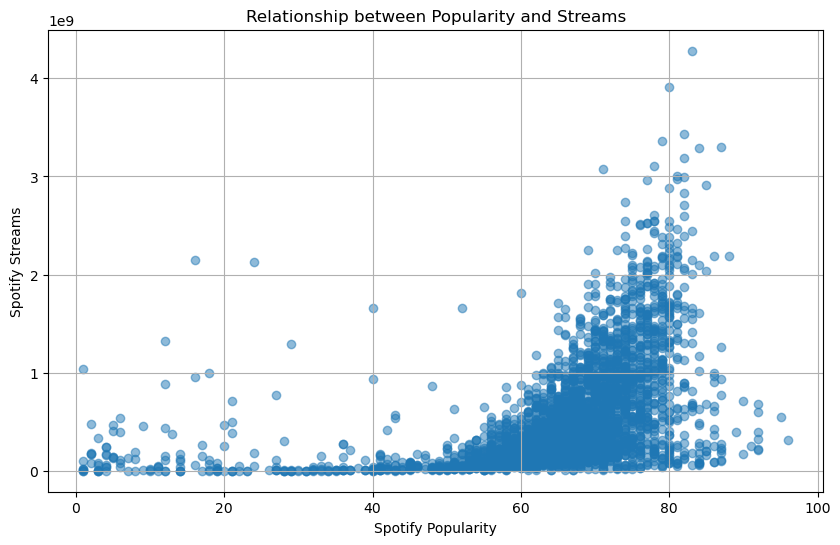

Correlation between Popularity and Streams: 0.44153548305516555


In [465]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Spotify Popularity'], data_cleaned['Spotify Streams'], alpha=0.5)
plt.title("Relationship between Popularity and Streams")
plt.xlabel("Spotify Popularity")
plt.ylabel("Spotify Streams")
plt.grid(True)
plt.show()

# Correlation coefficient
corr_pop_streams = data_cleaned[['Spotify Popularity', 'Spotify Streams']].corr().iloc[0, 1]
print(f"Correlation between Popularity and Streams: {corr_pop_streams}")

Having a correlation of 0.44 means that it is a moderate correlation, meaning that when the more the streamed a song is the more popular it is a well.

## How do the ratings change over time (by month/season)?

In [499]:
data_cleaned['Year'] = data_cleaned['Release Date'].dt.year
data_cleaned['Month'] = data_cleaned['Release Date'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_cleaned['Season'] = data_cleaned['Month'].apply(get_season)

In [509]:
monthly_ratings = data_cleaned.groupby('Month')['Spotify Popularity'].mean().reset_index()

seasonal_ratings = data_cleaned.groupby('Season')['Spotify Popularity'].mean().reset_index()

yearly_ratings = df.groupby('Year')['Spotify Popularity'].mean().reset_index()

In [503]:
print(monthly_ratings)

    Month  Spotify Popularity
0       1           68.257143
1       2           64.552301
2       3           65.007634
3       4           65.346304
4       5           65.303797
5       6           63.438596
6       7           65.399267
7       8           62.462406
8       9           63.258216
9      10           64.360996
10     11           64.827309
11     12           66.213018


In [505]:
print(seasonal_ratings)

   Season  Spotify Popularity
0  Autumn           64.192034
1  Spring           65.223952
2  Summer           63.773058
3  Winter           66.704918


In [511]:
print(yearly_ratings)

    Year  Spotify Popularity
0   1987           80.000000
1   1991           77.000000
2   1994           60.000000
3   1998           72.000000
4   1999           79.000000
5   2000           81.500000
6   2001           68.000000
7   2002           78.000000
8   2003           80.000000
9   2004           73.400000
10  2005           71.400000
11  2006           77.333333
12  2007           77.750000
13  2008           72.545455
14  2009           73.769231
15  2010           69.407407
16  2011           71.893617
17  2012           73.555556
18  2013           70.140000
19  2014           68.403226
20  2015           70.919540
21  2016           68.782609
22  2017           67.048649
23  2018           65.256757
24  2019           64.777385
25  2020           62.898462
26  2021           63.068182
27  2022           62.291667
28  2023           63.133545
29  2024           72.051282


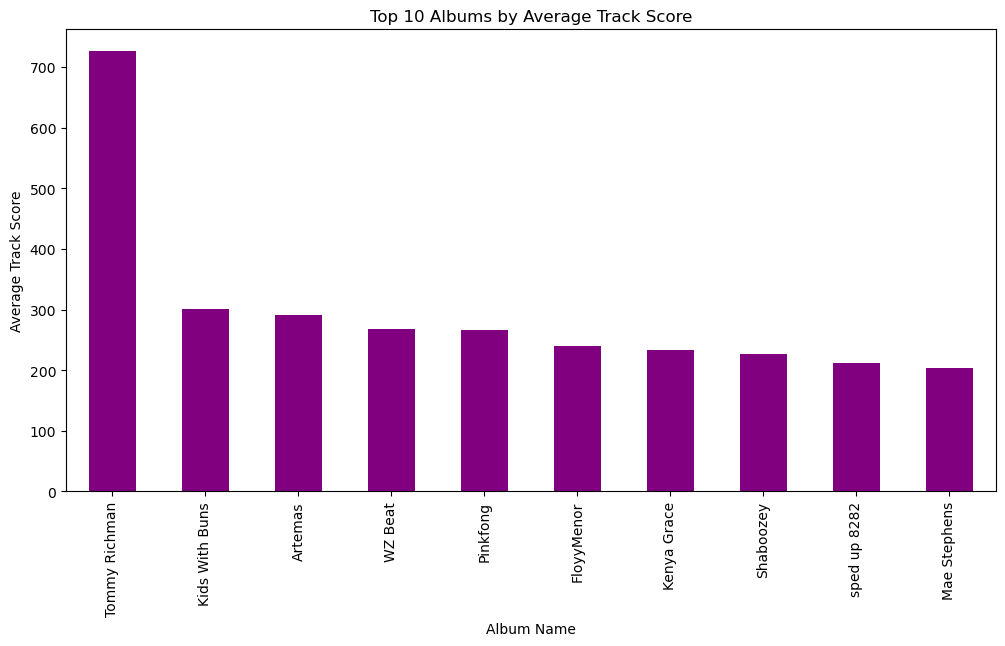

In [443]:
album_scores = data_cleaned.groupby('Album Name')['Track Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
album_scores.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Albums by Average Track Score')
plt.xlabel('Album Name')
plt.ylabel('Average Track Score')
plt.show()

In [461]:
data_cleaned[["Spotify Streams", "Spotify Popularity"]].corr()

,Spotify Streams,Spotify Popularity
Spotify Streams,1.000000,0.441535
Spotify Popularity,0.441535,1.000000


In [269]:
song_ratings = data_cleaned.sort_values(by='Spotify Popularity', ascending = False)
print(song_ratings.head())

                  Track                    Album Name             Artist  \
25   A Bar Song (Tipsy)            A Bar Song (Tipsy)          Shaboozey   
17             Espresso                      Espresso  Sabrina Carpenter   
0   MILLION DOLLAR BABY  Million Dollar Baby - Single      Tommy Richman   
6             Gata Only                     Gata Only         FloyyMenor   
29   BIRDS OF A FEATHER          HIT ME HARD AND SOFT      Billie Eilish   

   Release Date          ISRC  All Time Rank  Track Score  Spotify Streams  \
25   2024-04-12  USUYG1541249           37.0        226.4      311928522.0   
17   2024-04-12  USUM72403305           22.0        281.5      547882871.0   
0    2024-04-26  QM24S2402528            1.0        725.4      390470936.0   
6    2024-02-02  QZL382406049            8.0        375.8      675079153.0   
29   2024-05-17  USUM72401994           41.0        212.8      214237645.0   

   Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
2

## Top Performers

In [448]:
top_performers = data_cleaned.groupby('Artist')['Spotify Streams'].mean().sort_values(ascending=False)
print(top_performers)

Artist
Glass Animals              2.996181e+09
Hozier                     2.544490e+09
Vance Joy                  2.541834e+09
Macklemore & Ryan Lewis    2.397109e+09
John Legend                2.382407e+09
                               ...     
DJ BAHBUS                  3.201400e+04
TAIRA                      2.085500e+04
Mehmood J                  1.076200e+04
DAMIEN                     6.300000e+03
mitsu sound                1.384000e+03
Name: Spotify Streams, Length: 1471, dtype: float64


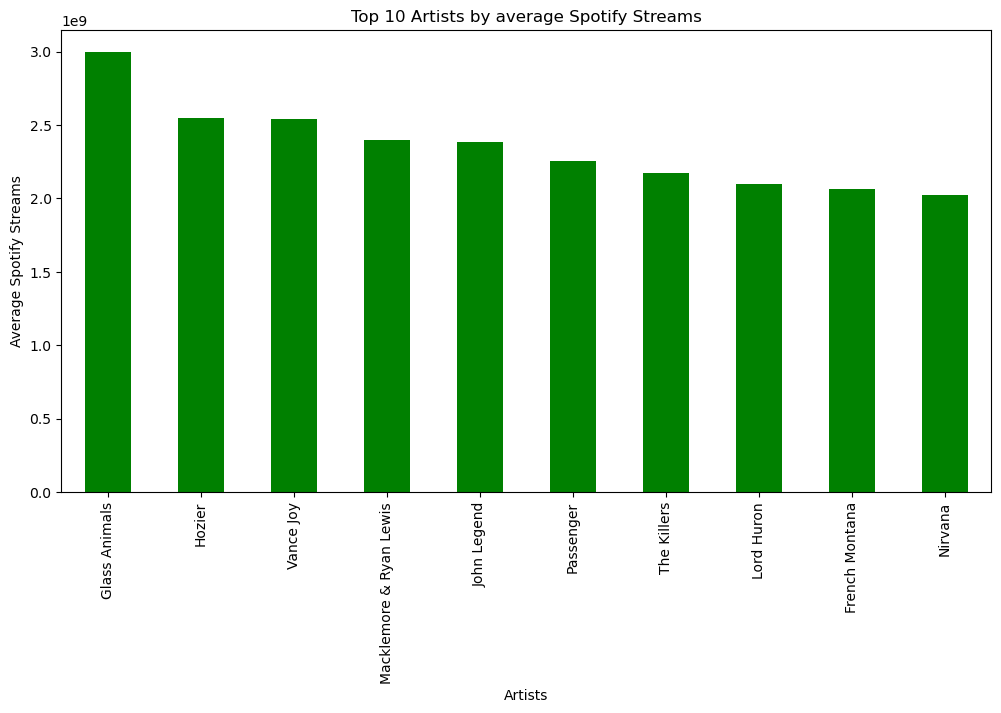

In [450]:
plt.figure(figsize=(12, 6))
top_performers.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Artists by average Spotify Streams')
plt.xlabel('Artists')
plt.ylabel('Average Spotify Streams')
plt.show()

In [515]:
data_cleaned[["Spotify Streams", "YouTube Likes", "TikTok Likes"]].corr()

,Spotify Streams,YouTube Likes,TikTok Likes
Spotify Streams,1.000000,0.560996,0.045008
YouTube Likes,0.560996,1.000000,0.048425
TikTok Likes,0.045008,0.048425,1.000000
